In [59]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

## 1. 중심극한정리 (central limit theorem)

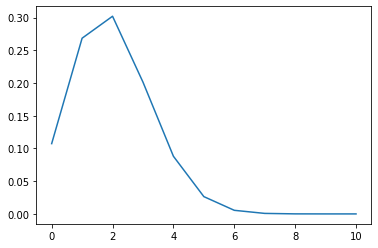

In [60]:
# (1) 이항분포 확률분포 (N=10, p=0.2) 객체 정의 및 확률분포함수를 plot
n,p=10,0.2
binomial=stats.binom(n,p) #이항분포 확률분포 객체 선언
x_axis=np.arange(n+1)
y_axis=binomial.pmf(x_axis) #확률분포함수 
plt.plot(x_axis,y_axis) #plot
plt.show()

In [138]:
# (2) 이항분포 확률분포의 객체와 표본 크기 N_samples를 입력변수로 받아, 표본평균을 생성하는 함수를 구현
# rvs함수의 size 인자를 이용할것

def generate_sample_mean(distrib, N_samples=50):
    sample_data=distrib.rvs(size=N_samples)
    mean_value=sample_data.mean()
    return mean_value
    
print(generate_sample_mean(binomial, 50))


2.28


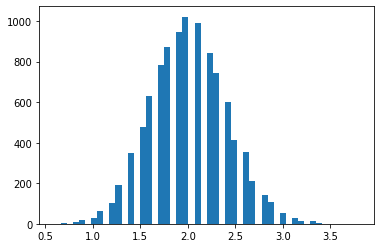

N_samples=10 (2.0103299999999997, 0.4001378401251249)


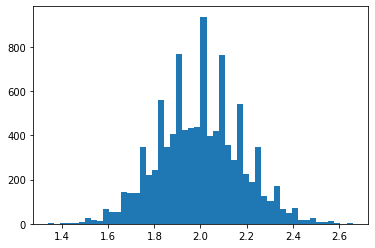

N_samples=50 (1.9981199999999997, 0.1803921993878893)


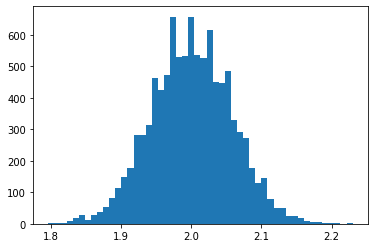

N_samples=500 (2.0002951999999996, 0.057142300067113155)


In [105]:
# (3) 표본평균을 10000개 생성하여 히스토그램을 (bin개수 50개) 표시. N_samples를 10개, 50개, 500개로 시도

test_case=[10,50,500]

for test_num in test_case:
  x_bars = [generate_sample_mean(binomial,test_num) for _ in range(10000)]

  plt.figure(0)
  plt.hist(x_bars, bins=50)
  plt.show()
  print('N_samples='+str(test_num), (np.mean(x_bars), np.std(x_bars)))




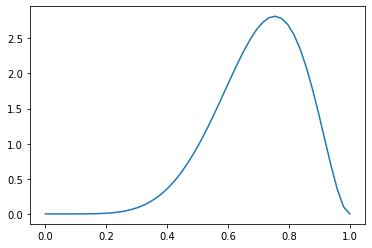

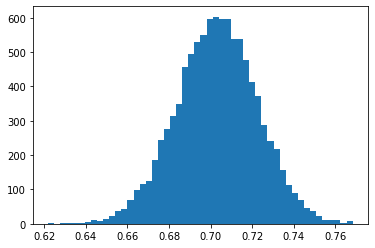

N_samples=50 (0.7029777875847121, 0.01948411193342111)


In [112]:
# (4) 다른 확률분포 (stats.distributions) 에서 생성된 표본평균의 분포도 볼 수 있다.
from scipy.stats import beta
from numpy import linspace
a, b = 7.028720,2.971280
beta_dist=beta(a,b)
x = np.linspace(beta.ppf(0.0, a, b),
                beta.ppf(1.0, a, b), 50)
plt.plot(x,beta_dist.pdf(x))
plt.show()

x_bars = [beta_dist.rvs(size=50).mean() for _ in range(10000)]

plt.hist(x_bars, bins=50)
plt.show()
print('N_samples=50', (np.mean(x_bars), np.std(x_bars)))


## 2. 모수 구간추정 및 가설검정 (confidence interval and hypothesis test)

데이터의 수: 167954
키 평균: 174.69018898031607 , 표준편차: 5.448833013622449


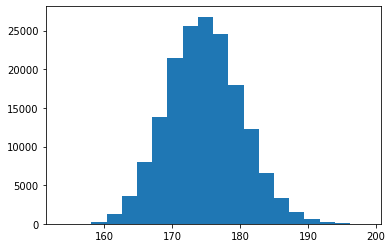

몸무게 평균: 72.16640407492528 , 표준편차: 13.713571398740728


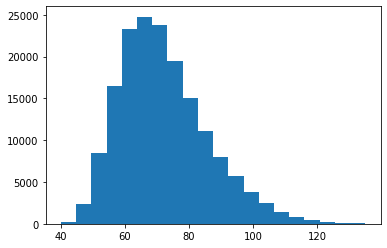

In [139]:
# (1) 데이터 읽어오기 및 원하는 데이터 열 단위로 추출하기, 시각화
# 육군 신체측정 정보 (https://www.data.go.kr/data/15083227/fileData.do)
data = np.genfromtxt('./army_phexam_data.csv' ,encoding='cp949', delimiter = ',',dtype=None )
#ipynb파일과 csv 파일을 같은 폴더에 놓고 진행하였습니다.
print('데이터의 수:', len(data)-1)

height_data=data[1:,4]
weight_data=data[1:,-1]

height=np.zeros_like(height_data)
weight=np.zeros_like(weight_data)
for idx in range(len(height_data)): 
  height[idx]=height_data[idx].strip('"').rstrip(" cm")
height=height.astype(np.float64)
for idx in range(len(weight_data)): 
  weight[idx]=weight_data[idx].strip('"').rstrip(" kg")

weight=weight.astype(np.float64)
print('키 평균:', height.mean(), ', 표준편차:', height.std())
plt.hist(height,20)
plt.show()

print('몸무게 평균:', weight.mean(), ', 표준편차:', weight.std())
plt.hist(weight,20)
plt.show()


In [125]:
# (2) 데이터에서 마지막 10000명을 선택하여 구간추정을 수행 후 분석


new_height_data=height[len(height)-10000:]

new_weight_data=weight[len(weight)-10000:]


print(stats.norm.interval(0.99,loc=np.mean(new_height_data),scale=stats.sem(new_height_data)))
print(stats.norm.interval(0.99,loc=np.mean(new_weight_data),scale=stats.sem(new_weight_data)))

# 전체 데이터에서 구한 평균치가 추정한 구간안에 들어가는가? 들어가지 않는다면 그 이유를 분석하면?
''' 분석:
신장의 경우에는 구간 안에 들어가나,  몸무게는 들어가지 않는다.

표본을 추출할 때, 표본오차를 고려한 표본 크기를 선정해서 추출해야한다.

이때, 신장은 표본 오차를 잘 고려하였으나, 
몸무게의 경우에는 표본오차로 구한 표본의 크기보다 작은 크기로 추출하여, 
추정된 구간내에 들어가지 않는 것으로 분석된다. 신장의 표준편차보다 몸무게의 표준편차가 훨씬크다.

표본오차= (2.58)*모분산/SQRT(표본수)의 식을 이용하는 경우,  

신장의 표본오차는 약 0.14이며, 몸무게의 표본오차는 약 0.35이다.
이것을 이용해 권장되는 포본의 크기를 구해보면, 
신장은 약 10000명이고, 몸무게는 약 10200명 정도로 
몸무게는 실제 뽑은 표본 수보다 크다. 
따라서 추정된 구간안에 들어가지 않는다.'''

(174.65694231834004, 174.9367176816599)
(72.46031277152855, 73.16458722847145)


' 분석:\n신장의 경우에는 구간 안에 들어가나,  몸무게는 들어가지 않는다.\n\n표본을 추출할 때, 표본오차를 고려한 표본 크기를 선정해서 추출해야한다.\n\n이때, 신장은 표본 오차를 잘 고려하였으나, \n몸무게의 경우에는 표본오차로 구한 표본의 크기보다 작은 크기로 추출하여, \n추정된 구간내에 들어가지 않는 것으로 분석된다. 신장의 표준편차보다 몸무게의 표준편차가 훨씬크다.\n\n표본오차= (2.58)*모분산/SQRT(표본수)의 식을 이용하는 경우,  \n\n신장의 표본오차는 약 0.14이며, 몸무게의 표본오차는 약 0.35이다.\n이것을 이용해 권장되는 포본의 크기를 구해보면, \n신장은 약 10000명이고, 몸무게는 약 10200명 정도로 \n몸무게는 실제 뽑은 표본 수보다 크다. \n따라서 추정된 구간안에 들어가지 않는다.'

In [116]:
# (3) 데이터에서 마지막 30명을 선택하여 구간추정 수행 후 분석

new_height_data2=height[len(height)-30:]

new_weight_data2=weight[len(weight)-30:]
print(stats.t.interval(0.99,30,loc=np.mean(new_height_data2),scale=stats.sem(new_height_data2)))
print(stats.t.interval(0.99,30,loc=np.mean(new_weight_data2),scale=stats.sem(new_weight_data2)))



(172.40003176106242, 176.70663490560432)
(66.561374227541, 79.49862577245901)


In [133]:
# (4) 데이터에서 2013년, 2016년에 측정된 체중값을 추출 후, 가설 검정 (H0:mu=mu_0, H1:mu>mu_0)

import pandas as pd
csv_data=pd.read_csv("./army_phexam_data.csv",encoding='cp949')
data_2013=csv_data[csv_data["측정 일자"]==2013]
weight_2013=data_2013["몸무게"].to_numpy()
mu_0=np.mean(weight_2013)
data_2016=csv_data[(csv_data["측정 일자"]>=20160000) & (csv_data["측정 일자"]<20170000)]
sample_d=data_2016[len(data_2016)-1000:]['몸무게']


print(stats.ttest_1samp(sample_d,mu_0))

# 귀무가설과 대립가설 중 어느 가설을 채택하고 기각해야 할까?
'''
귀무가설:

mu=71.79189644815627

대립가설:

mu>71.79189644815627 (단측 검정)

이다.

결과값은 검정통계량=2.3304940285241673, pvalue=0.019978376430331093이다.

p-value가 약 0.02가 나왔다. 
p-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택해야한다.
'''

Ttest_1sampResult(statistic=2.3304940285241673, pvalue=0.019978376430331093)


'\n귀무가설:\n\nmu=71.79189644815627\n\n대립가설:\n\nmu>71.79189644815627 (단측 검정)\n\n이다.\n\n결과값은 검정통계량=2.3304940285241673, pvalue=0.019978376430331093이다.\n\np-value가 약 0.02가 나왔다. \np-value가 0.05보다 작기 때문에 귀무가설을 기각하고 대립가설을 채택해야한다.\n'

In [137]:
# (5) 상관관계 분석 (키,몸무게), (키, 발 길이), (머리 둘레, 몸무게), ...
col_name=list(pd.DataFrame(csv_data))
data_np=csv_data.to_numpy()
pearson_corr=[] #for 분석

for i in range(2,len(col_name)-1):
  for j in range(i+1,len(col_name)):
    corr = np.corrcoef(data_np[:,i],data_np[:,j],rowvar=False)[1,0]
    pearson_corr.append([(col_name[i],col_name[j]),corr])
    print(col_name[i],"와 ",col_name[j],"의 상관계수: ",corr)

sorted_list=sorted(pearson_corr, key=lambda x : x[1]) #상관관계를 기준으로 sort

# 상관관계가 가장 큰 변수쌍과 가장 낮은 변수쌍은?
''' 
상관관계가 가장 큰 변수쌍: ('소매길이', '신장') 약 0.99
상관관계가 가장 낮은 변수쌍: ('소매길이', '머리 둘레') 약 0.15
pearson 상관계수는 0과 1 사이의 값을 가지기 때문에 
1에 가까운 ('소매길이', '신장') 변수쌍은 상관성이 높으며 ('소매길이', '머리 둘레')은 상관관계가 낮다
'''


가슴 둘레 와  소매길이 의 상관계수:  0.2560452797997786
가슴 둘레 와  신장 의 상관계수:  0.2570671759959904
가슴 둘레 와  허리 둘레 의 상관계수:  0.8558243235639508
가슴 둘레 와  샅높이 의 상관계수:  0.36257240050984085
가슴 둘레 와  머리 둘레 의 상관계수:  0.3790241533277269
가슴 둘레 와  발 길이 의 상관계수:  0.26340331470710454
가슴 둘레 와  몸무게 의 상관계수:  0.8937497511786289
소매길이 와  신장 의 상관계수:  0.9947892913045036
소매길이 와  허리 둘레 의 상관계수:  0.20611256365899924
소매길이 와  샅높이 의 상관계수:  0.7721188053593292
소매길이 와  머리 둘레 의 상관계수:  0.15643213262325686
소매길이 와  발 길이 의 상관계수:  0.5421523874315792
소매길이 와  몸무게 의 상관계수:  0.40107663496082163
신장 와  허리 둘레 의 상관계수:  0.2069798507075679
신장 와  샅높이 의 상관계수:  0.7763837668198087
신장 와  머리 둘레 의 상관계수:  0.1575778862236252
신장 와  발 길이 의 상관계수:  0.5452043682562919
신장 와  몸무게 의 상관계수:  0.40303780259297695
허리 둘레 와  샅높이 의 상관계수:  0.36489602699780854
허리 둘레 와  머리 둘레 의 상관계수:  0.3712912104267047
허리 둘레 와  발 길이 의 상관계수:  0.24167596465245814
허리 둘레 와  몸무게 의 상관계수:  0.8697753745890917
샅높이 와  머리 둘레 의 상관계수:  0.2102497488620404
샅높이 와  발 길이 의 상관계수:  0.47631839328738307
샅높이 와  몸무게 의

" \n상관관계가 가장 큰 변수쌍: ('소매길이', '신장') 약 0.99\n상관관계가 가장 낮은 변수쌍: ('소매길이', '머리 둘레') 약 0.15\npearson 상관계수는 0과 1 사이의 값을 가지기 때문에 \n1에 가까운 ('소매길이', '신장') 변수쌍은 상관성이 높으며 ('소매길이', '머리 둘레')은 상관관계가 낮다\n"

In [ ]:
####################################################